<a href="https://colab.research.google.com/github/mendiang/IYKRA-Data-Science-Fellowship-Batch-6/blob/main/Handson_IYKRA_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library


In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
dataset = pd.read_csv('/content/gdrive/MyDrive/IYKRA/Mall_Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
dataset.duplicated().sum()

0

In [10]:
dataset.columns = ['CustomerID', 'Gender', 'Age', 'Annual Income', 'Spending Score']
dataset.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
X = dataset.loc[:, ['Annual Income', 'Spending Score']]
X.head()

,Annual Income,Spending Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Hierarchical Clustering

In [ ]:
#Using Dendograms to find the optimal number of clusters
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(12,8))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

In [16]:
#Training Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5)

In [17]:
#Fit model with the data and predict
y_hc = hc.fit_predict(X)

In [18]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [20]:
X_hc = X.copy()
X_hc['cluster'] = y_hc
X_hc.head()

,Annual Income,Spending Score,cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


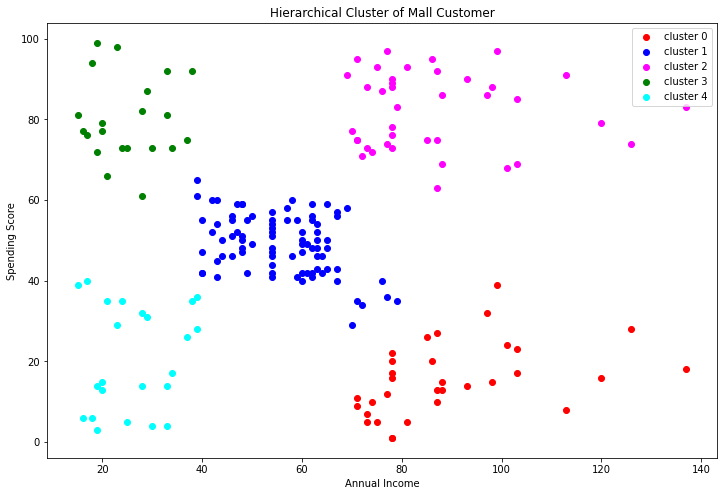

In [26]:
#Visualization
plt.figure(figsize=(12, 8)) 
plt.scatter(X_hc.loc[X_hc['cluster']==0, 'Annual Income'], X_hc.loc[X_hc['cluster']==0, 'Spending Score'], c='red', label='cluster 0')
plt.scatter(X_hc.loc[X_hc['cluster']==1, 'Annual Income'], X_hc.loc[X_hc['cluster']==1, 'Spending Score'], c='blue', label='cluster 1')
plt.scatter(X_hc.loc[X_hc['cluster']==2, 'Annual Income'], X_hc.loc[X_hc['cluster']==2, 'Spending Score'], c='magenta', label='cluster 2')
plt.scatter(X_hc.loc[X_hc['cluster']==3, 'Annual Income'], X_hc.loc[X_hc['cluster']==3, 'Spending Score'], c='green', label='cluster 3')
plt.scatter(X_hc.loc[X_hc['cluster']==4, 'Annual Income'], X_hc.loc[X_hc['cluster']==4, 'Spending Score'], c='cyan', label='cluster 4')
plt.title('Hierarchical Cluster of Mall Customer')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [28]:
pd.pivot_table(X_hc, values=['Annual Income', 'Spending Score'], index='cluster', 
               aggfunc=[np.mean, np.max, np.min, np.median])

mean                 ...        median               
        Annual Income Spending Score  ... Annual Income Spending Score
cluster                               ...                             
0           89.406250      15.593750  ...          86.5             15
1           55.811765      49.129412  ...          57.0             49
2           86.538462      82.128205  ...          79.0             83
3           25.095238      80.047619  ...          24.0             77
4           26.304348      20.913043  ...          25.0             17

[5 rows x 8 columns]

#DBSCAN

In [30]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=10, min_samples=3)
y_db = dbscan.fit_predict(X)

In [31]:
y_db

array([ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  0,  2,  0,  2,  3,  2,  3,  2,  0,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  0,  2,  3,  2,  0,  2,  3,  2,  3,  2,  3,
        2,  3,  2,  3,  2,  3,  2,  0,  2,  3,  2,  3,  2,  3,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,
       -1,  3,  2,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [33]:
from sklearn.metrics import davies_bouldin_score
sets = []
for i in range(5, 8):
    y_db = DBSCAN(eps=i, min_samples=3).fit_predict(x)
    #X_db = X.copy()
    #X_db['cluster'] = y_db
    #X_db = X_db.loc[X['cluster']!=-1]
    
    #val = silhouette_score(X_db[['Annual Income', 'Spending Score']], X_db['cluster'])

    sets.append(val)

plt.plot(range(10, 20), sets)
plt.title('Silhoute Score')
plt.ylabel('Score')
plt.xlabel('Eps')
plt.show()

NameError: ignored

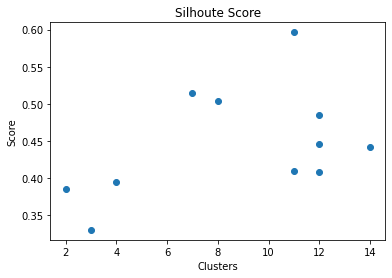

In [54]:
from sklearn.metrics import silhouette_score
sets = []
clusters = []
for i in range(2, 13):
    y_db = DBSCAN(eps=i, min_samples=3).fit_predict(X)
    
    X_db = X.copy()
    X_db['cluster'] = y_db
    X_db = X_db.loc[X_db['cluster'] !=-1, :]
    
    val = silhouette_score(X_db[['Annual Income', 'Spending Score']], X_db['cluster'])

    clusters.append(X_db['cluster'].nunique())
    sets.append(val)

plt.scatter(clusters, sets)
plt.title('Silhoute Score')
plt.ylabel('Score')
plt.xlabel('Clusters')
plt.show()

#HDBSCAN

In [34]:
!pip install hdbscan

     |████████████████████████████████| 6.4 MB 4.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311928 sha256=37ad5735e96bfa1de1ecb1d46b02edfc898143cfdd1994b9e680a004d543cbb4
  Stored in directory: /root/.cache/pip/wheels/73/5f/2f/9a259b84003b84847c259779206acecabb25ab56f1506ee72b
Successfully built hdbscan


In [36]:
from hdbscan import HDBSCAN

y_hdb = HDBSCAN().fit(X).labels_

In [37]:
X_hd = X.copy()
X_hd['cluster'] = y_hdb
X_hd.head()

,Annual Income,Spending Score,cluster
0,15,39,-1
1,15,81,3
2,16,6,1
3,16,77,3
4,17,40,-1


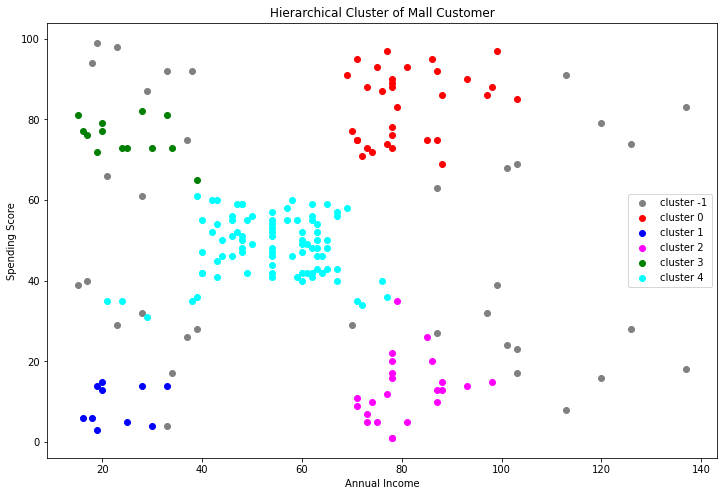

In [41]:
#Visualization
plt.figure(figsize=(12, 8)) 
plt.scatter(X_hd.loc[X_hd['cluster']==-1, 'Annual Income'], X_hd.loc[X_hd['cluster']==-1, 'Spending Score'], c='gray', label='cluster -1')
plt.scatter(X_hd.loc[X_hd['cluster']==0, 'Annual Income'], X_hd.loc[X_hd['cluster']==0, 'Spending Score'], c='red', label='cluster 0')
plt.scatter(X_hd.loc[X_hd['cluster']==1, 'Annual Income'], X_hd.loc[X_hd['cluster']==1, 'Spending Score'], c='blue', label='cluster 1')
plt.scatter(X_hd.loc[X_hd['cluster']==2, 'Annual Income'], X_hd.loc[X_hd['cluster']==2, 'Spending Score'], c='magenta', label='cluster 2')
plt.scatter(X_hd.loc[X_hd['cluster']==3, 'Annual Income'], X_hd.loc[X_hd['cluster']==3, 'Spending Score'], c='green', label='cluster 3')
plt.scatter(X_hd.loc[X_hd['cluster']==4, 'Annual Income'], X_hd.loc[X_hd['cluster']==4, 'Spending Score'], c='cyan', label='cluster 4')
plt.title('Hierarchical Cluster of Mall Customer')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [55]:
from hdbscan import HDBSCAN

y_hdb = HDBSCAN().fit(X).labels_

X_hd = X.copy()
X_hd['cluster'] = y_hdb

X_hd = X_hd.loc[X_hd['cluster'] != -1, :]

variable = X_hd[['Annual Income', 'Spending Score']]
target = X_hd['cluster']

print(silhouette_score(variable, target))
print(target.nunique())

0.590647771210724
5


#Isolation Forest

In [57]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(random_state=0)
clf.fit(X)
y_if = clf.predict(X)

In [61]:
X_if = X.copy()
X_if['cluster'] = y_if 

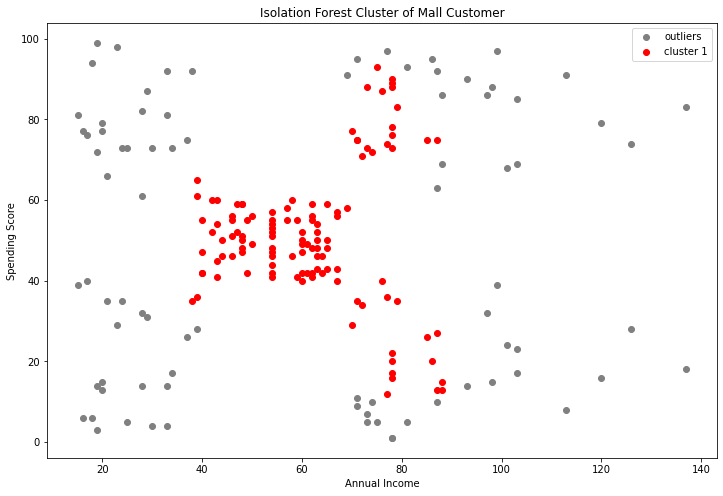

In [65]:
#Visualization
plt.figure(figsize=(12, 8)) 
plt.scatter(X_if.loc[X_if['cluster']==-1, 'Annual Income'], X_if.loc[X_if['cluster']==-1, 'Spending Score'], c='gray', label='outliers')
plt.scatter(X_if.loc[X_if['cluster']==1, 'Annual Income'], X_if.loc[X_if['cluster']==1, 'Spending Score'], c='red', label='cluster 1')

plt.title('Isolation Forest Cluster of Mall Customer')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [66]:
pd.pivot_table(X_if, values=['Annual Income', 'Spending Score'], index='cluster', 
               aggfunc=[np.mean, np.max, np.min, np.median])

mean                 ...        median               
        Annual Income Spending Score  ... Annual Income Spending Score
cluster                               ...                             
-1          59.397590      49.156627  ...            39             40
 1          61.384615      50.940171  ...            62             50

[2 rows x 8 columns]

In [68]:
!pip install validclust

In [69]:
from validclust import dunn
from sklearn.metrics import pairwise_distances

In [71]:
dist = pairwise_distances(X)

In [73]:
dunn(dist, y_hdb)

0.00988091159566946